<a href="https://colab.research.google.com/github/varshakarunya/public-service-demand-forecasting/blob/main/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=50000"
df = pd.read_csv(url)

df.head()

/tmp/ipython-input-1924194878.py:2: DtypeWarning: Columns (19,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,descriptor_2,location_type,incident_zip,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,67720523,2026-01-30T01:51:21.000,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,NaN,Store/Commercial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67746090,2026-01-30T01:51:04.000,NaN,DOE,Department of Education,School Maintenance,Heating Problem,No Heat,School,11226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.649787,-73.958550,POINT (-73.958549806928 40.649786963579)
2,67758820,2026-01-30T01:50:53.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,Residential Building/House,10025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.800498,-73.965680,POINT (-73.965679755617 40.800498409419)
3,67707975,2026-01-30T01:50:52.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,Residential Building/House,10302.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.629156,-74.144411,POINT (-74.144411237985 40.62915627182)
4,67771794,2026-01-30T01:50:32.000,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint - Non Passenger,Unauthorized Pick-Up Location,Street,11430.0,...,NaN,NaN,"JOHN F KENNEDY AIRPORT, QUEENS (JAMAICA) ,NY, ...",NaN,NaN,NaN,NaN,40.648320,-73.788281,POINT (-73.788281251302 40.648320486201)


In [3]:
df.shape, df.columns

((50000, 44),
 Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
        'complaint_type', 'descriptor', 'descriptor_2', 'location_type',
        'incident_zip', 'incident_address', 'street_name', 'cross_street_1',
        'cross_street_2', 'intersection_street_1', 'intersection_street_2',
        'address_type', 'city', 'landmark', 'facility_type', 'status',
        'due_date', 'resolution_description', 'resolution_action_updated_date',
        'community_board', 'council_district', 'police_precinct', 'bbl',
        'borough', 'x_coordinate_state_plane', 'y_coordinate_state_plane',
        'open_data_channel_type', 'park_facility_name', 'park_borough',
        'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location',
        'bridge_highway_name', 'bridge_highway_direction', 'road_ramp',
        'bridge_highway_segment', 'latitude', 'longitude', 'location'],
       dtype='object'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      50000 non-null  int64  
 1   created_date                    50000 non-null  object 
 2   closed_date                     19617 non-null  object 
 3   agency                          50000 non-null  object 
 4   agency_name                     50000 non-null  object 
 5   complaint_type                  50000 non-null  object 
 6   descriptor                      49660 non-null  object 
 7   descriptor_2                    27965 non-null  object 
 8   location_type                   46614 non-null  object 
 9   incident_zip                    49634 non-null  float64
 10  incident_address                48706 non-null  object 
 11  street_name                     48704 non-null  object 
 12  cross_street_1                  

In [5]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['year'] = df['created_date'].dt.year
df['month'] = df['created_date'].dt.month
df['day_of_week'] = df['created_date'].dt.day_name()

df[['created_date', 'year', 'month', 'day_of_week']].head()

,created_date,year,month,day_of_week
0,2026-01-30 01:51:21,2026,1,Friday
1,2026-01-30 01:51:04,2026,1,Friday
2,2026-01-30 01:50:53,2026,1,Friday
3,2026-01-30 01:50:52,2026,1,Friday
4,2026-01-30 01:50:32,2026,1,Friday


In [6]:
monthly_demand = (
    df.groupby(df['created_date'].dt.to_period('M'))
      .size()
      .reset_index(name='request_count')
)

monthly_demand['created_date'] = monthly_demand['created_date'].dt.to_timestamp()
monthly_demand.head()

,created_date,request_count
0,2026-01-01,50000


### Monthly Demand Trends

The monthly aggregation shows relatively stable public service demand over time.
This level of aggregation is useful for high-level resource planning and staffing decisions,
while smoothing short-term variability observed at daily or weekly levels.

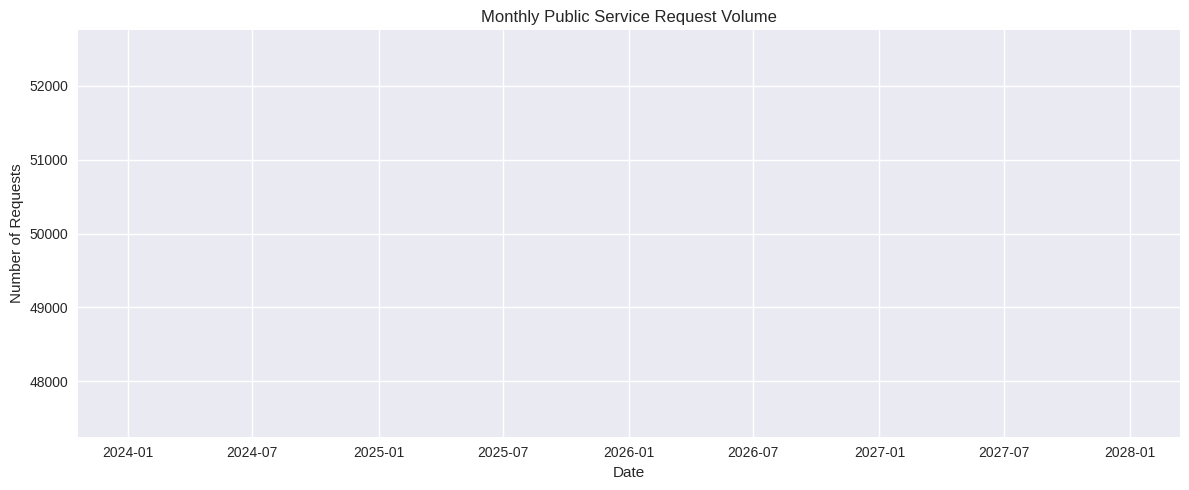

In [7]:
plt.figure(figsize=(12,5))
plt.plot(monthly_demand['created_date'], monthly_demand['request_count'])
plt.title("Monthly Public Service Request Volume")
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()